# Imports

In [79]:
import pandas as pd
import math
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage import filters
from skimage.util import random_noise
from PIL import Image

%run -i ../scripts/fyp2021p3_group08_functions.py

In [80]:
all_file = pd.read_csv('../data/2017/ISIC-2017_Training_Part3_GroundTruth.csv')
ALLDATA = pd.DataFrame(all_file)
ALLDATA = ALLDATA[ALLDATA['seborrheic_keratosis'] == 0]
ALLDATA

image_id  melanoma  seborrheic_keratosis
0     ISIC_0000000       0.0                   0.0
1     ISIC_0000001       0.0                   0.0
2     ISIC_0000002       1.0                   0.0
3     ISIC_0000003       0.0                   0.0
4     ISIC_0000004       1.0                   0.0
...            ...       ...                   ...
1991  ISIC_0015190       1.0                   0.0
1992  ISIC_0015200       1.0                   0.0
1993  ISIC_0015204       1.0                   0.0
1994  ISIC_0015219       1.0                   0.0
1998  ISIC_0015284       1.0                   0.0

[1746 rows x 3 columns]

# Images

In [81]:
IMG_PATH = '../data/example_image/ISIC_0012099.jpg'


# Lecture notebook

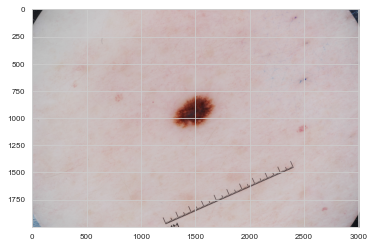

In [82]:
im = plt.imread(IMG_PATH)
plt.imshow(im)

In [83]:
# A color image is an array with 3 dimensions (x, y, R-G-B color channels) of integers
print(im.shape)
print(im.dtype)

(2000, 3008, 3)
uint8


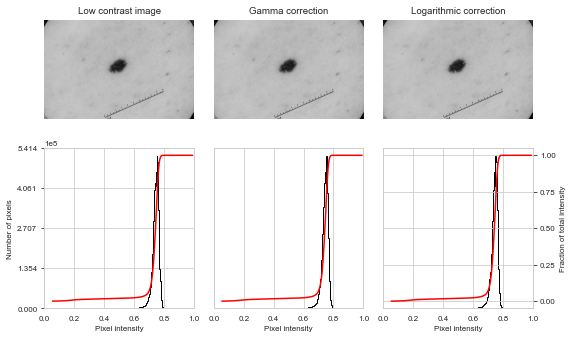

In [84]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage.color import rgb2gray
from skimage import data, img_as_float
from skimage import exposure

matplotlib.rcParams['font.size'] = 8
im_gs = rgb2gray(im)

def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(im_gs)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(im_gs, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(im_gs.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(im_gs, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = im_gs

# Gamma
gamma_corrected = exposure.adjust_gamma(img, 2)

# Logarithmic
logarithmic_corrected = exposure.adjust_log(img, 1)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_corrected, axes[:, 1])
ax_img.set_title('Gamma correction')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(logarithmic_corrected, axes[:, 2])
ax_img.set_title('Logarithmic correction')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

In [85]:
# Get a single RGB value from the blue circle (marker used by dermatologist)
print(im[850,1500,:])

[109  46  37]


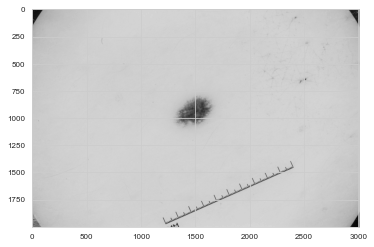

In [86]:
# Show only the red channel
plt.imshow(im[:,:,0], cmap='gray')

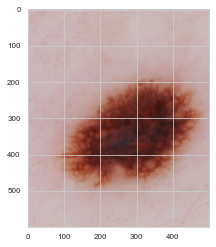

In [87]:
# Display only a part of the image
im_part = im[600:1200,1200:1700,:]
plt.imshow(im_part)

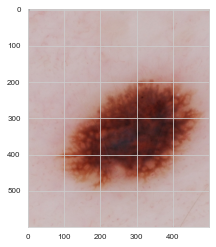

In [88]:
# Modify the image by setting some pixels to black
im_copy = im_part.copy()

im_copy[0:5,0:5,:] = np.tile(0, [5, 5, 3])
plt.imshow(im_copy)

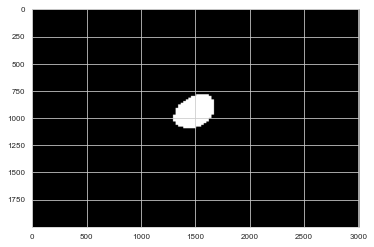

In [89]:
# Load the mask and display it
mask = plt.imread('../data/example_segmentation/ISIC_0012099_segmentation.png')
plt.imshow(mask, cmap='gray')

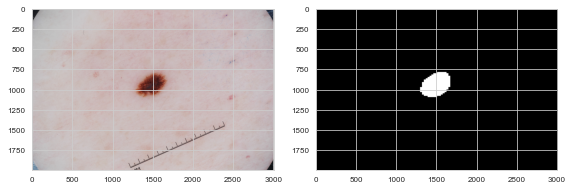

In [90]:
# Show image and mask side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
axes[0].imshow(im)
axes[1].imshow(mask, cmap='gray')
fig.tight_layout()

image size: (3008, 2000)


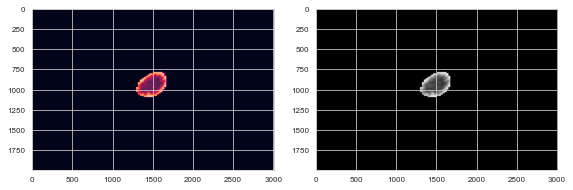

In [91]:
# Show the images overlayed, for this we can use PIL 
# Load images as Image objects  
img1 = Image.open('../data/example_image/ISIC_0012099.jpg') 
img2 = Image.open('../data/example_segmentation/ISIC_0012099_segmentation.png') 
  
# Overlay - more options such as transparency should be available here  
img2.paste(img1, (0,0), mask = img2) 
  
# Display 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
axes[0].imshow(img2) #one channel image, not sure what makes the colours this way
axes[1].imshow(img2, cmap='gray') # but to fix it use cmap to show as grayscale
fig.tight_layout()

# Note that this is a single channel image
print("image size:", img2.size)   

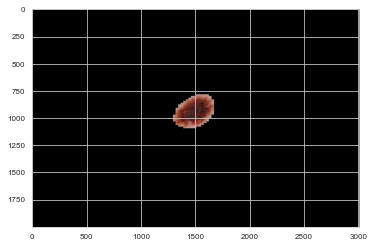

In [92]:
# Alternative: replace the non-lesion pixels
img1 = im.copy()
img1[mask==0] = 0
  
# Display 
plt.imshow(img1)

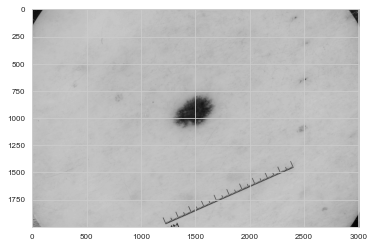

In [93]:
# conver to RGB
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

img1 = plt.imread('../data/example_image/ISIC_0012099.jpg')
gray = rgb2gray(img1)

plt.imshow(gray, cmap='gray')

In [94]:
# histogram of colour channels
# plt.hist(gray)

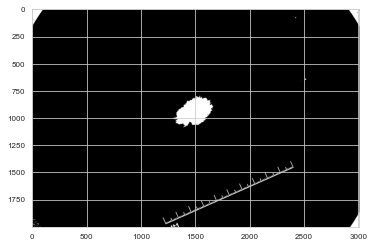

In [95]:
# making out own masks - will epxlain more on Friday
img2 = gray < 120
plt.imshow(img2, cmap='gray')

# Exercises

## Exercise 1

1. Use matplotlib.pyplot package to load an image and the corresponding segmentation. Display the images side by side (as subplots)

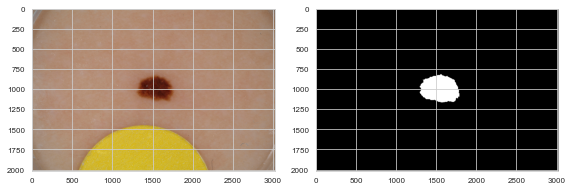

In [96]:
IMG_PATH2 = '../data/example_image/ISIC_0001852.jpg'

# Load image
im2 = plt.imread(IMG_PATH2)

# Load segmentation/mask
mask2 = plt.imread('../data/example_segmentation/ISIC_0001852_segmentation.png')

# Display 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
axes[0].imshow(im2)
axes[1].imshow(mask2, cmap='gray')
fig.tight_layout()

2. Inspect the dimensions and values inside the images, what do you notice?

In [97]:
print("Image size: {} by {} pixels.".format(im2.shape[0], im2.shape[1]))

Image size: 2016 by 3024 pixels.


3. How can you use the mask to measure the width or height of the skin lesion at different points in the image? 

Mask out all rows and columns that are black.


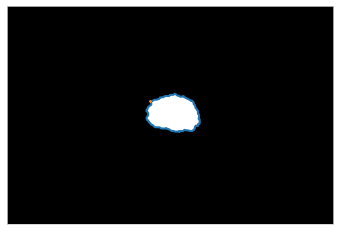

In [98]:
contours = skimage.measure.find_contours(mask2, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(mask2, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

## Exercise 2

Review the provided functions for measuring the area and perimeter, then try the following:
- What do you expect from these values for a perfect circle?
- Verify your hypothesis by drawing a circle.
    - Do your measurements confirm your hypothesis? 
    - Why/why not 
Hint: try to think what happens for a tiny circle, with a diameter of only a few pixels. 

The formulas of perimeter P and area A of a circle with a radius r are :

$P = 2πr$
$A = πr^2$

In [99]:
n = 4

A = math.pi * (n ** 2)
P = 2*math.pi*n
print(A, P)

50.26548245743669 25.132741228718345


In [100]:
circle = morphology.disk(n)
circle

array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=uint8)

In [101]:
measure_area_perimeter(circle)

(49, 20)

- Create a scatter plot for the area and perimeter of the images you are provided with. 
    - Do you see some patterns already? 
    - Are there some outliers? 
    - If yes, can you explain why some images have such values?

In [102]:
img_files_list = list(ALLDATA['image_id'])

In [103]:
path = '../data/2017/ISIC-2017_Training_Part1_GroundTruth/'
img_mask = '_segmentation.png'
img_colour = '.jpg'

ap = list()

for img in img_files_list:
    im = plt.imread(path + img + img_mask)
    area, perimeter = measure_area_perimeter(im)
    ap.append([img, area, perimeter])

In [104]:
def plot_img(img_num):
    path = '../data/2017/ISIC-2017_Training_Data/'
    img_mask = '_segmentation.png'
    img_colour = '.jpg'
    im = plt.imread(path + img_num + img_colour)
    plt.imshow(im)

In [105]:
def plot_img_mask(img_num):
    # Load image
    path_img = '../data/2017/ISIC-2017_Training_Data/'
    path_mask = '../data/2017/ISIC-2017_Training_Part1_GroundTruth/'
    img_colour = '.jpg'
    img_mask = '_segmentation.png'

    im = plt.imread(path_img + img_num + img_colour)
    ma = plt.imread(path_mask + img_num + img_mask)

    # Display 
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
    axes[0].imshow(im)
    axes[1].imshow(ma, cmap='gray')
    fig.tight_layout()

In [106]:
ap = pd.DataFrame(ap)
ap.rename(columns = {1: "area", 2: "perimeter"}, inplace=True)
ap.head(3)

0      area  perimeter
0  ISIC_0000000  364956.0     2258.0
1  ISIC_0000001   53432.0      914.0
2  ISIC_0000002  237402.0     2071.0

In [107]:
ALLDATA.head(3)

image_id  melanoma  seborrheic_keratosis
0  ISIC_0000000       0.0                   0.0
1  ISIC_0000001       0.0                   0.0
2  ISIC_0000002       1.0                   0.0

In [108]:
all_plus_features = pd.merge(ALLDATA, ap, how='left', left_on='image_id', right_on=0).drop([0], axis=1)
all_plus_features.head(3)

image_id  melanoma  seborrheic_keratosis      area  perimeter
0  ISIC_0000000       0.0                   0.0  364956.0     2258.0
1  ISIC_0000001       0.0                   0.0   53432.0      914.0
2  ISIC_0000002       1.0                   0.0  237402.0     2071.0

In [109]:
all_plus_features['diagnosis_sum'] = all_plus_features['melanoma'] + all_plus_features['seborrheic_keratosis']
all_plus_features['diagnosis'] = all_plus_features['diagnosis_sum'].map({0: 'not cancerous', 1: 'cancerous'})
all_plus_features.head(3)

image_id  melanoma  seborrheic_keratosis      area  perimeter  \
0  ISIC_0000000       0.0                   0.0  364956.0     2258.0   
1  ISIC_0000001       0.0                   0.0   53432.0      914.0   
2  ISIC_0000002       1.0                   0.0  237402.0     2071.0   

   diagnosis_sum      diagnosis  
0            0.0  not cancerous  
1            0.0  not cancerous  
2            1.0      cancerous

In [143]:
all_plus_features['diagnosis'].value_counts()

not cancerous    1372
cancerous         374
Name: diagnosis, dtype: int64

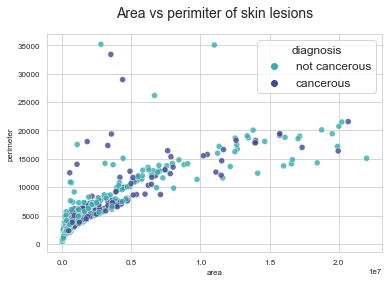

In [111]:
sns.set_style('whitegrid')
scatter = sns.scatterplot(data=all_plus_features, x="area", y="perimeter", hue="diagnosis", palette="mako_r", alpha=0.8)

scatter.set_title('Area vs perimiter of skin lesions', fontsize = 14, y =1.05)

scatter.legend(fontsize = 12,
               bbox_to_anchor= (1, 1), 
               title="diagnosis", 
               title_fontsize = 12, 
               facecolor = 'white')

- Try to modify an image from your dataset in some way, like adding noise to the image or to the mask. 
    - How does this affect the features?

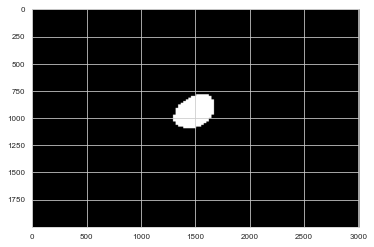

In [112]:
plt.imshow(mask, cmap='gray')

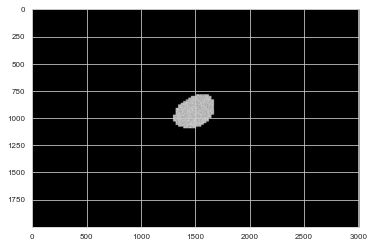

In [113]:
noise_img = random_noise(mask, mode='poisson')
plt.imshow(noise_img, cmap='gray')

In [114]:
print(measure_area_perimeter(mask), "<- without noise")
print(measure_area_perimeter(noise_img), "<- with noise")

(88455.0, 1353.0) <- without noise
(64494.0, 22469.0) <- with noise


- Try to modify the code of measuring the area and perimeter (for example, morphology.disk with parameter 1, vary the parameter or choose a different shape, or look at morphology functions which is not erosion). 
    - Investigate how this affects the masks (you might want to visualize intermediate steps here), and how this then affects the area/perimeter measurements.

## Other features
Choose a property you want to measure (asymmetry, border, colour) and search the literature to find out how it can be measured, and/or look at an existing implementation online.
- Are there different (conceptual) ways to measure the same feature? 
-   Are there different implementations (for instance, the steps are similar, but different functions or parameters are used) of the same concept?
- Adapt an implementation to work with the skin lesion images, and examine the feature values this outputs for your data. 
    - Do you see differences for healthy and cancer lesions? 
    - What if you vary the parameters of the method?
- Create some artificial images (like a perfect circle, an image of a single colour, etc) and measure the feature for those. Do you get values that you would expect?
- Create scatter plots for pairs of features you have so far. You might want to normalize the features first. 
    - Can you see (some) separation between the healthy and cancer lesions?

In [115]:
all_plus_features['compactness'] = (all_plus_features['perimeter']**2)/(4 * math.pi * all_plus_features['area'])

In [116]:
all_plus_features

image_id  melanoma  seborrheic_keratosis        area  perimeter  \
0     ISIC_0000000       0.0                   0.0    364956.0     2258.0   
1     ISIC_0000001       0.0                   0.0     53432.0      914.0   
2     ISIC_0000002       1.0                   0.0    237402.0     2071.0   
3     ISIC_0000003       0.0                   0.0    260712.0     1848.0   
4     ISIC_0000004       1.0                   0.0    269484.0     1746.0   
...            ...       ...                   ...         ...        ...   
1741  ISIC_0015190       1.0                   0.0  12575987.0    18268.0   
1742  ISIC_0015200       1.0                   0.0  20680044.0    21573.0   
1743  ISIC_0015204       1.0                   0.0  13977416.0    17821.0   
1744  ISIC_0015219       1.0                   0.0   8019976.0    13546.0   
1745  ISIC_0015284       1.0                   0.0  11498412.0    12110.0   

      diagnosis_sum      diagnosis  compactness  
0               0.0  not cancerous     1.111725  
1               0.0  not cancerous     1.244174  
2               1.0      cancerous     1.437692  
3               0.0  not cancerous     1.042397  
4               1.0      cancerous     0.900214  
...             ...            ...          ...  
1741            1.0      cancerous     2.111690  
1742            1.0      cancerous     1.790852  
1743            1.0      cancerous     1.808121  
1744            1.0      cancerous     1.820703  
1745            1.0      cancerous     1.014940  

[1746 rows x 8 columns]

<AxesSubplot:xlabel='diagnosis_sum', ylabel='compactness'>

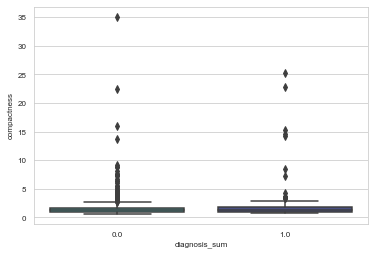

In [117]:
# sns.scatterplot(data=all_plus_features, x="area", y="perimeter", hue="diagnosis_sum")
sns.boxplot(x="diagnosis_sum", y="compactness", data=all_plus_features, palette="mako_r")

<AxesSubplot:>

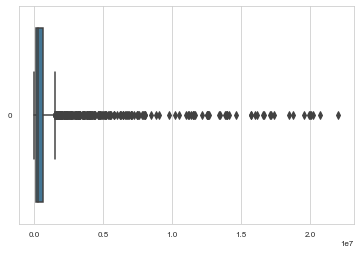

In [118]:
sns.boxplot(data=all_plus_features['area'], orient="h", palette="mako_r")

<AxesSubplot:>

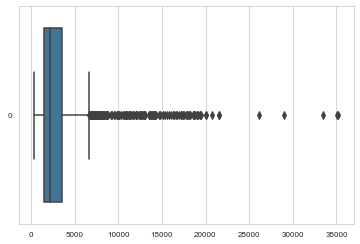

In [119]:
sns.boxplot(data=all_plus_features['perimeter'], orient="h", palette="mako_r")

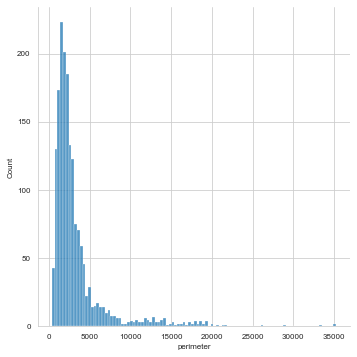

In [120]:
sns.displot(all_plus_features['perimeter'])

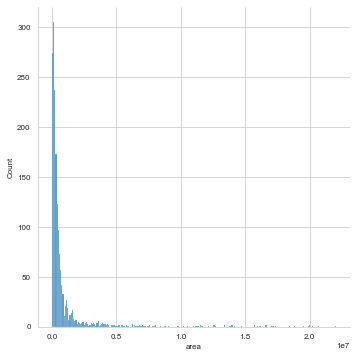

In [121]:
sns.displot(all_plus_features['area'])


In [122]:
all_plus_features.iloc[:,3:8]
# all_plus_features[['area', 'perimeter', 'compactness', 'compactness', 'diagnosis']]

area  perimeter  diagnosis_sum      diagnosis  compactness
0       364956.0     2258.0            0.0  not cancerous     1.111725
1        53432.0      914.0            0.0  not cancerous     1.244174
2       237402.0     2071.0            1.0      cancerous     1.437692
3       260712.0     1848.0            0.0  not cancerous     1.042397
4       269484.0     1746.0            1.0      cancerous     0.900214
...          ...        ...            ...            ...          ...
1741  12575987.0    18268.0            1.0      cancerous     2.111690
1742  20680044.0    21573.0            1.0      cancerous     1.790852
1743  13977416.0    17821.0            1.0      cancerous     1.808121
1744   8019976.0    13546.0            1.0      cancerous     1.820703
1745  11498412.0    12110.0            1.0      cancerous     1.014940

[1746 rows x 5 columns]

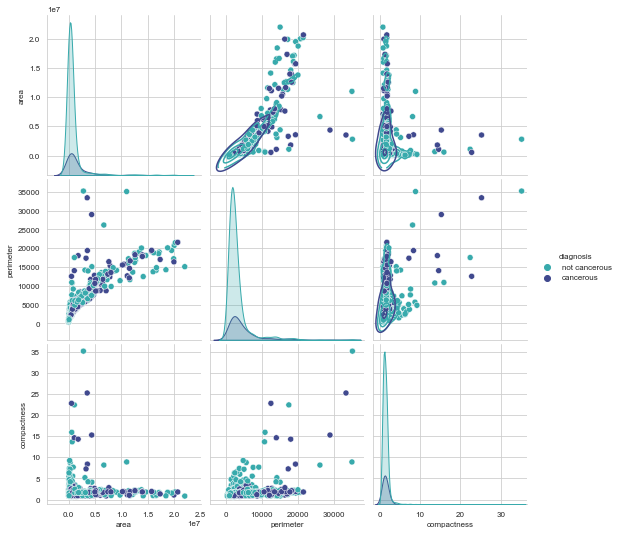

In [123]:
plotting = all_plus_features.iloc[:,3:8].drop(['diagnosis_sum'], axis=1)
g = sns.pairplot(plotting, hue='diagnosis', palette="mako_r")
g.map_upper(sns.kdeplot, levels=4, color=".2")

In [124]:
all_plus_features.std()

melanoma                4.103865e-01
seborrheic_keratosis    0.000000e+00
area                    2.556073e+06
perimeter               3.594292e+03
diagnosis_sum           4.103865e-01
compactness             1.619378e+00
dtype: float64

In [125]:
all_plus_features.describe()

melanoma  seborrheic_keratosis          area     perimeter  \
count  1746.000000                1746.0  1.746000e+03   1746.000000   
mean      0.214204                   0.0  1.059736e+06   3331.855670   
std       0.410386                   0.0  2.556073e+06   3594.291964   
min       0.000000                   0.0  9.132000e+03    348.000000   
25%       0.000000                   0.0  1.430570e+05   1502.500000   
50%       0.000000                   0.0  3.068100e+05   2239.500000   
75%       0.000000                   0.0  6.925545e+05   3574.250000   
max       1.000000                   0.0  2.201296e+07  35205.000000   

       diagnosis_sum  compactness  
count    1746.000000  1746.000000  
mean        0.214204     1.536329  
std         0.410386     1.619378  
min         0.000000     0.568721  
25%         0.000000     0.954858  
50%         0.000000     1.247175  
75%         0.000000     1.701595  
max         1.000000    35.141327

In [126]:
all_plus_features[all_plus_features['compactness'] > 15]

image_id  melanoma  seborrheic_keratosis       area  perimeter  \
1424  ISIC_0013618       1.0                   0.0  3521581.0    33413.0   
1431  ISIC_0013664       0.0                   0.0   594013.0    10902.0   
1531  ISIC_0014073       0.0                   0.0  2806601.0    35205.0   
1559  ISIC_0014166       0.0                   0.0  1090716.0    17525.0   
1561  ISIC_0014173       1.0                   0.0  4370786.0    28966.0   
1567  ISIC_0014190       1.0                   0.0   549111.0    12539.0   

      diagnosis_sum      diagnosis  compactness  
1424            1.0      cancerous    25.228033  
1431            0.0  not cancerous    15.922327  
1531            0.0  not cancerous    35.141327  
1559            0.0  not cancerous    22.407557  
1561            1.0      cancerous    15.275929  
1567            1.0      cancerous    22.785355

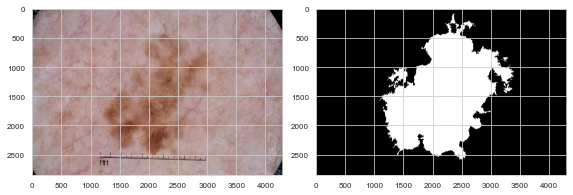

In [127]:
plot_img_mask('ISIC_0014073')

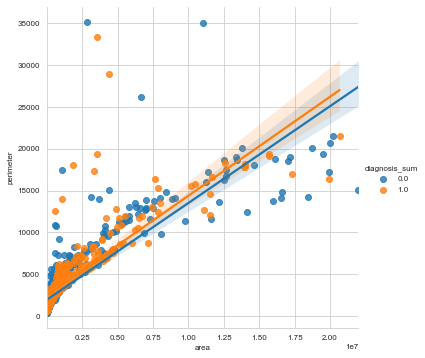

In [128]:
sns.lmplot(data=all_plus_features, x="area", y="perimeter", hue="diagnosis_sum", height=5)

In [129]:
all_plus_features.to_csv('../data/melanoma_healthy.csv', index=False)

In [130]:
df = all_plus_features[['area', 'perimeter', 'compactness']]
normalized_df = (df-df.min())/(df.max()-df.min())

In [131]:
normalized_df.corr(method='spearman')

area  perimeter  compactness
area         1.000000   0.952123     0.129929
perimeter    0.952123   1.000000     0.385872
compactness  0.129929   0.385872     1.000000

In [132]:
normalized_df.describe()

area    perimeter  compactness
count  1746.000000  1746.000000  1746.000000
mean      0.047746     0.085603     0.027988
std       0.116165     0.103115     0.046840
min       0.000000     0.000000     0.000000
25%       0.006086     0.033121     0.011169
50%       0.013528     0.054265     0.019624
75%       0.031059     0.092557     0.032768
max       1.000000     1.000000     1.000000

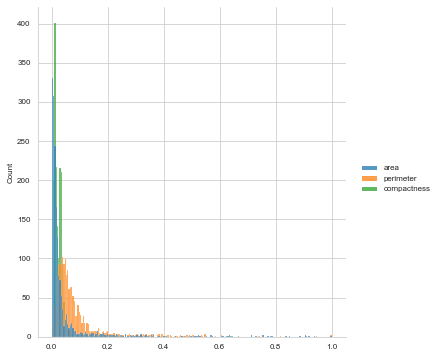

In [133]:
sns.displot(data=normalized_df)

In [134]:
# adapted from: https://github.com/AnthonyDiSanti/gdev_machine_learning/blob/master/4-pipeline.py

X = all_plus_features[['area', 'perimeter', 'compactness']]
y = all_plus_features['diagnosis_sum']

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5)

def measure(algo, outputLabel):
    classifier = algo()
    classifier.fit(X_train, y_train)

    predictions = classifier.predict(X_test)
    print(outputLabel + " Accuracy: " + str(metrics.accuracy_score(y_test, predictions)))

from sklearn import metrics, tree, neighbors
algos = { 'Tree': tree.DecisionTreeClassifier,
          'K-Nearest Neighbor': neighbors.KNeighborsClassifier }

for outputLabel, algo in algos.items():
    measure(algo, outputLabel)

Tree Accuracy: 0.6746849942726232
K-Nearest Neighbor Accuracy: 0.7674684994272624


In [135]:
def crop_mask_plot_plot(img_path):
    borders = np.where(img_path == 1) # This will return 2 arrays with the index where the pixels are ones
    top, bottom, left, right = max(borders[0]), min(borders[0]), min(borders[1]), max(borders[1])
    center = ((top+bottom) //2, (left + right) //2) # Tuple with the coordinates for the center of the lesion

    mask_part = mask[bottom:top, left:right]
    plt.imshow(mask_part)

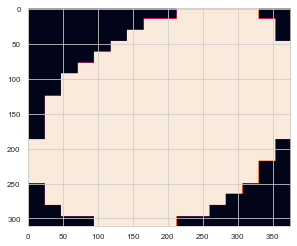

In [136]:
crop_mask_plot_plot(mask)

In [137]:
def find_center(img_path):
    borders = np.where(img_path == 1) # This will return 2 arrays with the index where the pixels are ones
    top, bottom, left, right = max(borders[0]), min(borders[0]), min(borders[1]), max(borders[1])
    center = ((top+bottom) //2, (left + right) //2) # Tuple with the coordinates for the center of the lesion
    return center

In [138]:
def radial_profile(img_path):

    center = find_center(img_path)
    
    y, x = np.indices((img_path.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)

    sd, mean = np.std(r), np.mean(r)

    return sd, mean

In [139]:
print(radial_profile(mask))

(547.2554224412993, 1157.4335845345922)


In [140]:
def find_compactness(mask_path):
    # Measure area: the sum of all white pixels in the mask image
    area = np.sum(mask_path)

    # Measure perimeter: first find which pixels belong to the perimeter.
    struct_el = morphology.disk(1)
    mask_eroded = morphology.binary_erosion(mask_path, struct_el)
    image_perimeter = mask_path - mask_eroded

    # Now we have the perimeter image, the sum of all white pixels in it
    perimeter = np.sum(image_perimeter)

    compactness = (perimeter**2)/(4 * math.pi * area)

    return compactness

In [141]:
print(find_compactness(mask))

1.6468852592759675


In [ ]:
# import scipy.stats as stats

# #perform two sample t-test with equal variances
# stats.ttest_ind(a=group1, b=group2, equal_var=True)

In [142]:
all_plus_features2 = plt.imread()

image_id  melanoma  seborrheic_keratosis        area  perimeter  \
0     ISIC_0000000       0.0                   0.0    364956.0     2258.0   
1     ISIC_0000001       0.0                   0.0     53432.0      914.0   
2     ISIC_0000002       1.0                   0.0    237402.0     2071.0   
3     ISIC_0000003       0.0                   0.0    260712.0     1848.0   
4     ISIC_0000004       1.0                   0.0    269484.0     1746.0   
...            ...       ...                   ...         ...        ...   
1741  ISIC_0015190       1.0                   0.0  12575987.0    18268.0   
1742  ISIC_0015200       1.0                   0.0  20680044.0    21573.0   
1743  ISIC_0015204       1.0                   0.0  13977416.0    17821.0   
1744  ISIC_0015219       1.0                   0.0   8019976.0    13546.0   
1745  ISIC_0015284       1.0                   0.0  11498412.0    12110.0   

      diagnosis_sum      diagnosis  compactness  
0               0.0  not cancerous     1.111725  
1               0.0  not cancerous     1.244174  
2               1.0      cancerous     1.437692  
3               0.0  not cancerous     1.042397  
4               1.0      cancerous     0.900214  
...             ...            ...          ...  
1741            1.0      cancerous     2.111690  
1742            1.0      cancerous     1.790852  
1743            1.0      cancerous     1.808121  
1744            1.0      cancerous     1.820703  
1745            1.0      cancerous     1.014940  

[1746 rows x 8 columns]

In [ ]:
sns.boxplot(x="day", y="total_bill", data=tips)